# Project 13 California Housing dataset Prediction
-->Aim to predict the California housing price with given data.

## Lets Load the Important Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.datasets  

## Lets Load the datasets

In [4]:
data=sklearn.datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)

In [5]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [6]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [10]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [11]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=pd.DataFrame(data.target)

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
Target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


## Lets check the null values

In [14]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

From the above we can see that their are no null values

## Statistical Summary

In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


From the above we can see that their is significant difference between max and mean in AveRooms and AveBedrms, indicates high chances for outliers

## Lets Check the corrleation of data

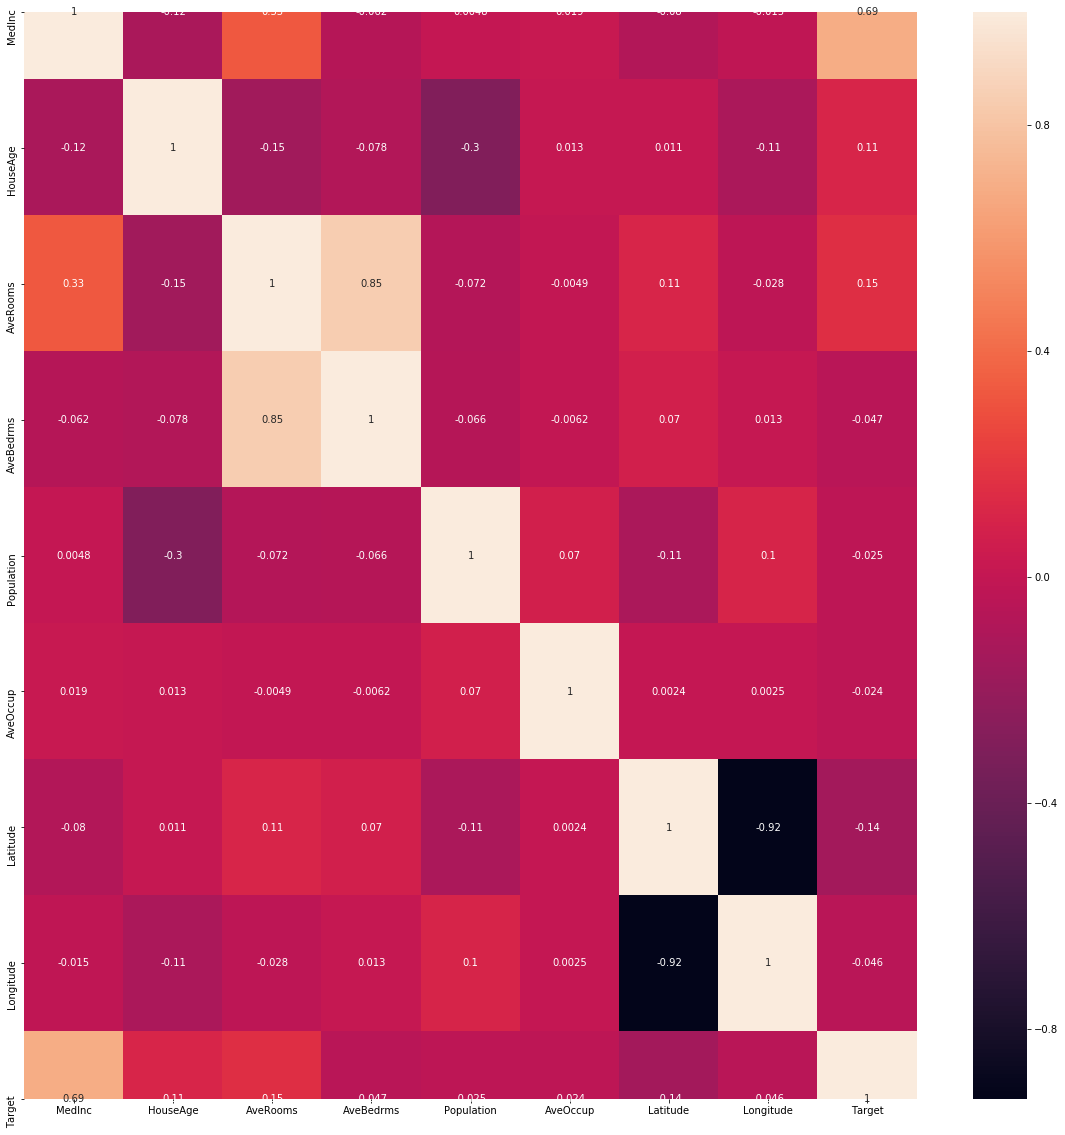

In [14]:
plt.figure(figsize=(20,20))
sns.color_palette("husl", 8)
sns.heatmap(df.corr(), annot=True)

From the above we can see that AveRooms and AveBedrms are highly positively correlated and Latitude and Longitude are negatively correlated, but as most of important independent features are positively correlated with dependent features, which might have a good impact on our model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E5EBC8A08>,
      dtype=object)

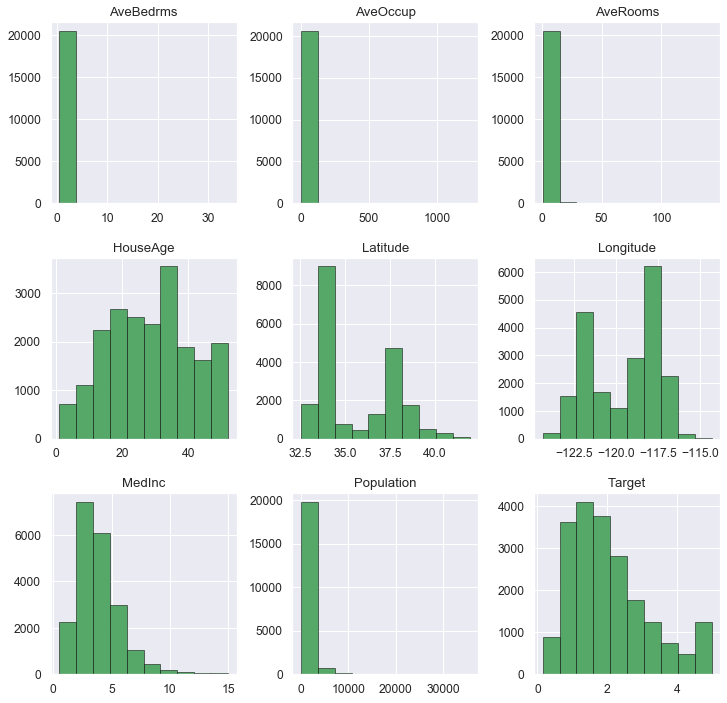

In [15]:
sns.set(style='darkgrid',font_scale=1.1)
df.hist(figsize=(12,12),color='g',edgecolor='black',linewidth=0.5)

From the above we can see that most of our data are postively and negatively skewed.

In [16]:
df.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
Target         0.977763
dtype: float64

In [23]:
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])

In [24]:
df.skew()

MedInc        0.405834
HouseAge      0.060331
AveRooms      0.920251
AveBedrms     6.501504
Population   -0.460095
AveOccup      2.295294
Latitude      0.465953
Longitude    -0.297801
Target        0.244259
dtype: float64

## Let do the EDA

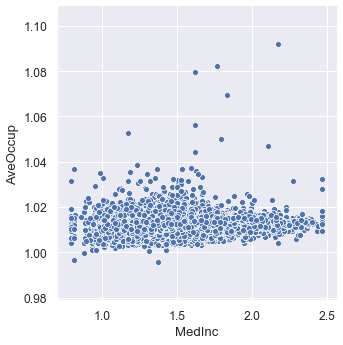

In [26]:
sns.set(font_scale=1.1)
sns.relplot(x="MedInc",y="AveOccup",data=df)

From the above we can see that most of the median income per block with averageoccupation is between 1 to 1.5.

Text(0.5, 1.0, 'Average Price of houses According to HouseAge')

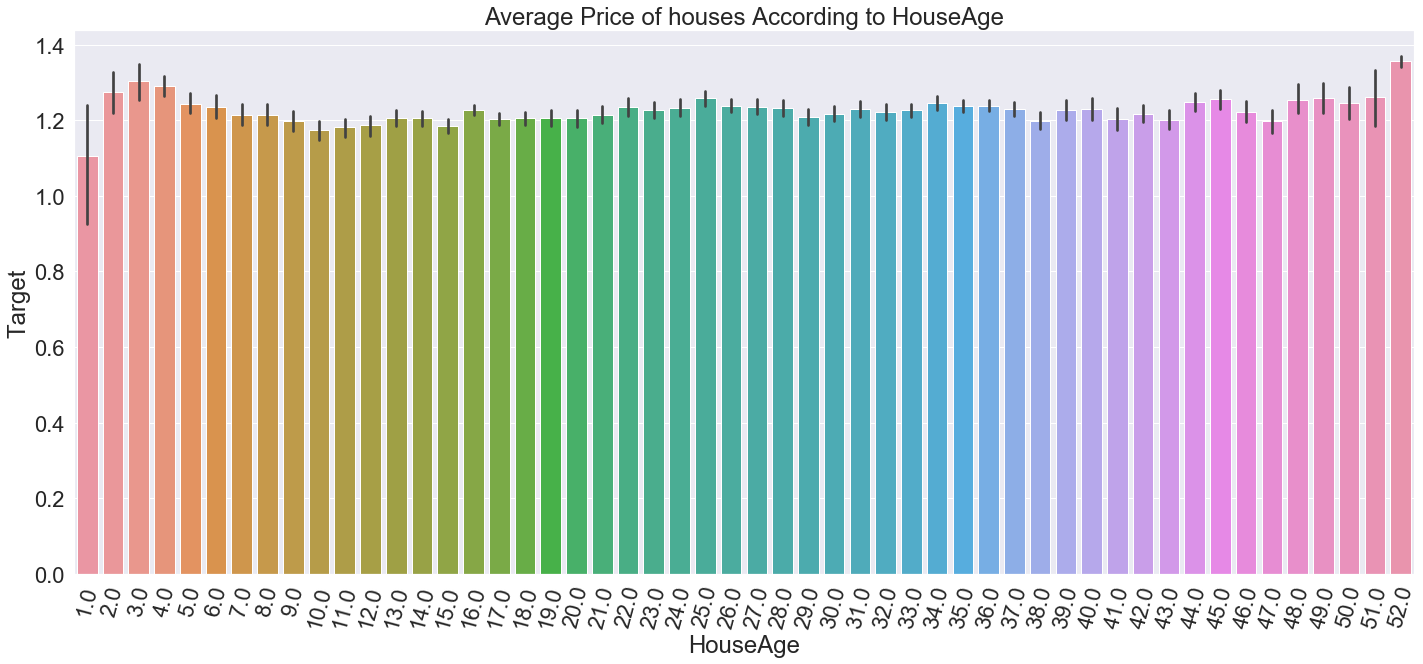

In [20]:
sns.set(font_scale=2)
plt.figure(figsize=(24,10))
sns.barplot(x='HouseAge',y='Target',data=df)
plt.xticks(rotation=75)
plt.xlabel('HouseAge')
plt.ylabel('Target')
plt.title('Average Price of houses According to HouseAge')

From the above we can see that new house have lowest price, whereas house prices are consistent and oldest house have higest price.

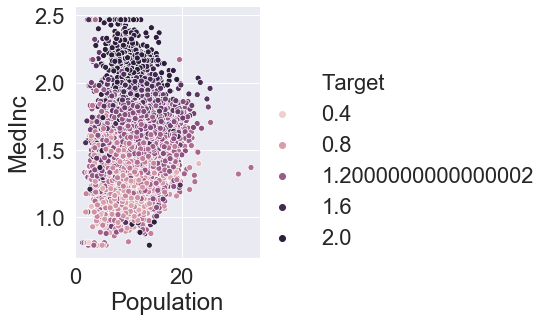

In [21]:
sns.relplot(x='Population',y='MedInc',hue='Target',data=df)

From the above we can see that major block of population have median income between 1 to 2, however we can see that major amount of population whose house valuation is high lies above 1.75, and few low median income population also have high expensive houses.

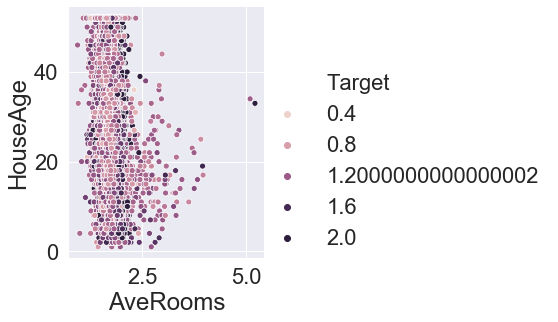

In [22]:
sns.relplot(x='AveRooms',y='HouseAge',hue='Target',data=df)

From the above we can see that as the age of the houses increases the average number of rooms also increasses, we can also see that house prices also increases as number of rooms increases.

In [25]:
## lets remove our outliers
from scipy.stats import zscore
df=df[(np.abs(zscore(df))<3).all(axis=1)]

## Lets split and scale the data

In [26]:
x=df.iloc[:,:-1]
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.026741,41.0,1.024286,1.000291,1.899550,1.011651,37.88,-122.23
1,2.024808,21.0,1.022858,0.999648,2.374647,1.009260,37.86,-122.22
2,1.936097,52.0,1.026453,1.000875,1.992957,1.012803,37.85,-122.24
3,1.780352,52.0,1.021977,1.000871,2.019210,1.011614,37.85,-122.25
4,1.566789,52.0,1.022947,1.000963,2.022009,1.009676,37.85,-122.25


In [27]:
y=df['Target']
y.head()

0    1.654137
1    1.530487
2    1.521325
3    1.505609
4    1.506931
Name: Target, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15840, 8), (3960, 8), (15840,), (3960,))

## Lets implement ML Algorithm

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [32]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=56)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=56)
RFR=RandomForestRegressor(random_state=56)
GBR=GradientBoostingRegressor(random_state=56)

In [33]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [34]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=8,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.7008790849357136
Mean_Squared_Error = 0.015570456348501538
Mean_Absolute_Error = 0.09472284918206682
Root_Mean_Squared_Error = 0.12478163466031986
Cross_Val_Score =  0.6537265927349981


------------------------------------- Lasso -------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.0025563938973163225
Mean_Squared_Error = 0.05218712494488845
Mean_Absolute_Error = 0.18681343513747364
Root_Mean_Squared_Error = 0.2284450151456329
Cross_Val_Score =  -0.1321113818324909


------------------------------------- Ridge -------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normaliz

In [35]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.700879,0.015570,0.094723,0.124782,0.653727
1,Lasso,-0.002556,0.052187,0.186813,0.228445,-0.132111
2,Ridge,0.700892,0.015570,0.094722,0.124779,0.653725
3,DecisionTreeRegressor,0.685827,0.016354,0.087102,0.127883,0.389546
4,AdaBoostRegressor,0.569400,0.022414,0.121118,0.149715,0.484331
5,RandomForestRegressor,0.822190,0.009256,0.067482,0.096207,0.646287
6,GradientBoostingRegressor,0.809241,0.009930,0.073122,0.099648,0.705931


From the above we can that RandomForest and GradientBoosting are performing quite well, than others however we will choose Random or Gradient but before choose our model, lets hypertunne our models.

## Lets HyperTune our models

In [ ]:
##RandomForest Regressor
from sklearn.model_selection import GridSearchCV
RFRpara={
    "n_estimators"     :[10,30,50,80,100,150,200,250],
    "max_features"     :["auto","sqrt","log2"],
    "min_samples_split":[2,4,8,10],
    "bootstrap"        :[True,False],
    }
gFR=GridSearchCV(RFR,param_grid=RFRpara,n_jobs=1,cv=8)
gFR.fit(x_train,y_train)

In [ ]:
gFR.best_score_ , gFR.best_params_

In [ ]:
RFR=RandomForestRegressor(bootstrap = False,
  max_features = 'log2',
  min_samples_split = 2,
  n_estimators = 200)
score=cross_val_score(RFR,x,y,cv=8,scoring='r2').mean()

In [ ]:
##GradientBoosting Regressor
paramGBR={'n_estimators':[100,200,300,400,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[2], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] 
            } 
gridGBR = GridSearchCV(GBR, param_grid=paramGBR, n_jobs=1, cv=8)
gridGBR.fit(x_train, y_train)
            

In [ ]:
gridGBR.best_score_ , gridGBR.best_params_

However from the above we got the we can see that the Random forest with hyper parameter tunning we got 84%, hence we choose the Random Forest Regressor as our final model. 

In [36]:
from sklearn.externals import joblib
joblib.dump(RFR,'Claifornia_Hosuing_prediction.obj')

['Claifornia_Hosuing_prediction.obj']

In [37]:
model=joblib.load('Claifornia_Hosuing_prediction.obj')

In [38]:
predictions=model.predict(x_test)

In [39]:
pre = pd.DataFrame(predictions)
pre.columns = ["prediction"]
pre.to_csv("Claifornia_Hosuing_prediction.csv")